In [22]:
# import numpy as np
import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_deltamu = np.linspace(-1.0, 1.0, 11)

nb_pas_temps = 500
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=10

# interpreter.gamma_dt(parametres[0], (x,y), kT, deltamu)
# interpreter.rugosite_dt(nb_pas_temps, parametres[1], (x,y), kT[0], deltamu[0])


# interpreter.plot_growth_2d(grid, show=True)

In [23]:
liste_moy_gamma_kbt=[]
liste_moy_rugosite_kbt=[]
liste_std_gamma_kbt=[]
liste_std_rugosite_kbt=[]
for param_kbT in liste_kT:
    print(param_kbT)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_gamma)

    liste_moy_gamma_kbt.append(gamma_moy_param)
    liste_moy_rugosite_kbt.append(rugosite_moy_param)

    liste_std_gamma_kbt.append(gamma_std_param)
    liste_std_rugosite_kbt.append(rugosite_std_param)



0.5
0
1
2
3
4
5
6
7
8
9
0.75
0
1
2
3
4
5
6
7
8
9
1.0
0
1
2
3
4
5
6
7
8
9
1.25
0
1
2
3
4
5
6
7
8
9
1.5
0
1
2
3
4
5
6
7
8
9
1.75
0
1
2
3
4
5
6
7
8
9
2.0
0
1
2
3
4
5
6
7
8
9


In [28]:
liste_gamma_moy_mu=[]
liste_rugosite_moy_mu=[]
liste_gamma_std_mu=[]
liste_rugosite_std_mu=[]
for param_mu in liste_deltamu:
    print(param_mu)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_gamma)

    liste_gamma_moy_mu.append(gamma_moy_param)
    liste_rugosite_moy_mu.append(rugosite_moy_param)

    liste_gamma_std_mu.append(gamma_std_param)
    liste_rugosite_std_mu.append(rugosite_std_param)

-1.0
-0.8
-0.6
-0.3999999999999999
-0.19999999999999996
0.0
0.20000000000000018
0.40000000000000013
0.6000000000000001
0.8
1.0


C:\Users\laure\AppData\Local\Temp\ipykernel_10656\1153471764.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


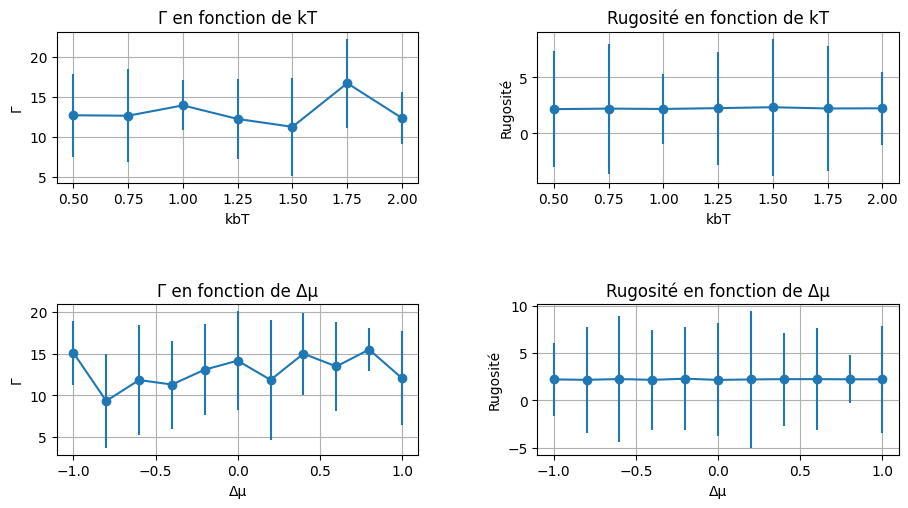

In [34]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
ax[0][0].errorbar(liste_kT,liste_moy_gamma_kbt,liste_std_gamma_kbt,fmt='o')
ax[0][0].plot(liste_kT,liste_moy_gamma_kbt,color='#1f77b4')
ax[0][0].grid()
ax[0][0].set_xlabel('kbT')
ax[0][0].set_ylabel('Γ')
ax[0][0].set_title("Γ en fonction de kT")

ax[0][1].errorbar(liste_kT,liste_moy_rugosite_kbt,liste_std_rugosite_kbt,fmt='o')
ax[0][1].plot(liste_kT,liste_moy_rugosite_kbt,color='#1f77b4')
ax[0][1].grid()
ax[0][1].set_xlabel('kbT')
ax[0][1].set_ylabel('Rugosité')
ax[0][1].set_title("Rugosité en fonction de kT")

ax[1][0].errorbar(liste_deltamu,liste_gamma_moy_mu,liste_gamma_std_mu,fmt='o')
ax[1][0].plot(liste_deltamu,liste_gamma_moy_mu,color='#1f77b4')
ax[1][0].grid()
ax[1][0].set_xlabel('Δμ')
ax[1][0].set_ylabel('Γ')
ax[1][0].set_title("Γ en fonction de Δμ")

ax[1][1].errorbar(liste_deltamu,liste_rugosite_moy_mu,liste_rugosite_std_mu,fmt='o')
ax[1][1].plot(liste_deltamu,liste_rugosite_moy_mu,color='#1f77b4')
ax[1][1].grid()
ax[1][1].set_xlabel('Δμ')
ax[1][1].set_ylabel('Rugosité')
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=4.0) 
fig.show()